**현업에서 사용되는 머신러닝 프로젝트 진행 가이드**
1. 문제를 정의하고 큰 그림을 그린다.
  - 목표를 비즈니스 용어로 정의한다. => 도메인에 대한 인식 필요
  - 솔루션은 어떻게 사용할 것인지 확인
  - 현재 해당 솔루션이 존재한다면 차선책은 무엇인지 고려
  - 어떤 문제인지(알고리즘 - 지도/비지도, 온라인/오프라인)
  - 성능을 측정하는 방법
  - 가설

2. 데이터를 수집한다.
  - 데이터를 수집하는 기관, 별도로 데이터 수집을 해야하는지
  - 데이터의 양, 어떤 공간에 저장할지
  - 수집된 데이터를 확인
  - 접근권한, 민감한 데이터 처리

3. 통찰을 얻기 위헤 데이터를 탐색한다. => EDA, Preprocessing
  - 사본
  - 특징 탐색, 시각화 탐색
  - 상관 분석
  - 결측치, 이상치 처리
  - 보간법: 대체 방법

4. 데이터에 내재된 패턴이 머신러닝 알고리즘에 잘 드러나도록 데이터를 준비한다.
  - 훈련세트와 테스트세트 분리 (검증세트)
  - 하이퍼파라미터 준비 => 그리드 서치
   
5. 여러 다른 모델을 시험해보고 가장 좋은 몇개를 고른다.
  - 여러 종류의 모델과 기본 매개변수를 훈련
  - 성능을 측정하고 비교
  - 매개변수(파라미터, 하이퍼파라미터, 모델파라미터)

6. 모델을 세밀하게 튜닝하고 이들을 연결해 최선의 솔루션을 만든다.
  
7. 솔루션을 출시한다.
  - 보고서
  - 발표 자료

8. 시스템을 론칭하고 모니터링과 유지보수를 한다.
  - 불특정 다수에게 제공되는 서비스

# 문제 정의
- 농구 선수의 경기 기록을 바탕으로 해당 선수들의 포지션을 예측해보자
- 2017년 NBA 농구 선수들의 게임 기록 데이터셋
- 알고리즘: 분류(Classification)
- 평가지표: confusion matrix, precision, recall, F1 score...

In [38]:
# 필수 라이브러리
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

In [39]:
import seaborn as sns
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## 데이터 수집
- 2017년 NBA 농구 선수의 게임 데이터

In [40]:
df = pd.read_csv('basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


## 데이터 탐색
- 가설을 이용한 타당성 검증에 필요한 과정

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


- Player: 선수 이름
- Pos: 포지션
- 3P: 한 경기 평균 3점슛 성공 횟수
- 2P: 한 경기 평균 2점슛 성공 횟수
- TRB: 한 경기 평균 리바운드 성공 횟수
- AST: 한 경기 평균 어시스트 성공 횟수
- STL: 한 경기 평균 스틸 성공 횟수
- BLK: 한 경기 평균 블로킹 성공 횟수

In [42]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

- C(Center): 센터, 골대(포스트) 근처에서 슛을 블로킹, 리바운드, 공을 라인 밖으로 빼내고 공격 찬스 만들기, 골대 근처에서 2점슛
- SG(Shooting Guard): 3점슛 등 장거리에서 슛을 해서 점수를 얻는 역할

## 시각화를 통한 데이터 탐색
- 포지션을 예측하는 문제이다.
- 현재 가지고 있는 포지션은 센터와 슈팅가드만 존재한다.
- 불필요하다고 판단되는 특성을 찾아 처리한다.(2P, AST, STL)
- 불필요하다는 근거? 가설 입증이 필요하다.


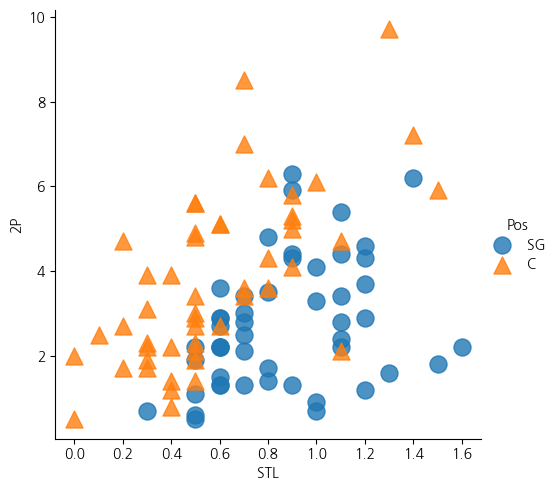

In [43]:
# 스틸, 2점슛 시각화
sns.lmplot(x='STL', y='2P', data=df,
           hue='Pos', scatter_kws={'s':150},
           markers=['o', '^'],
           fit_reg=False)
# fit_reg=False: 그리드 선 없애기
# scatter_kws={'s':150}: 점 사이즈

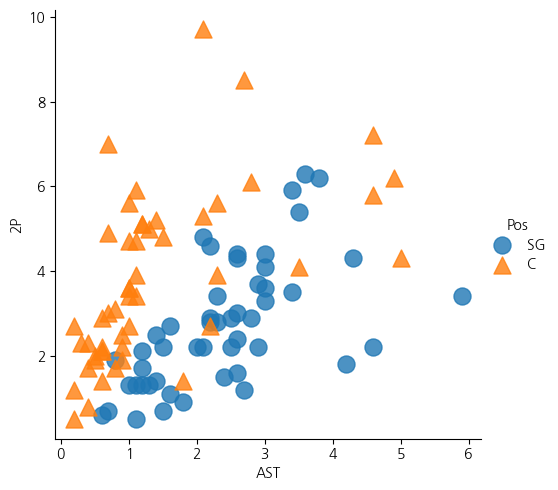

In [44]:
# 어시스트, 2점슛 시각화
sns.lmplot(x='AST', y='2P', data=df,
           hue='Pos', scatter_kws={'s':150},
           markers=['o', '^'],
           fit_reg=False)

plt.show()

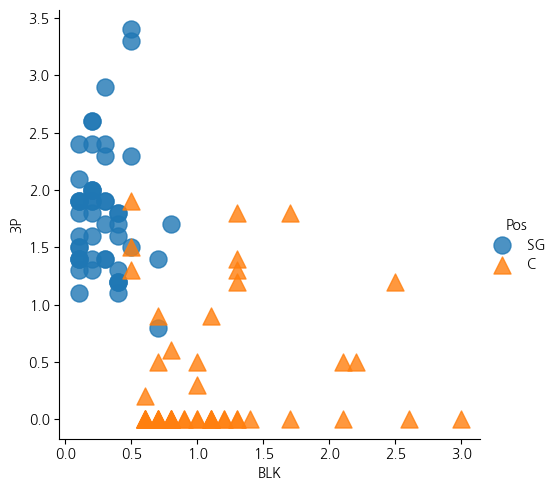

In [45]:
# 블로킹, 3점슛 시각화
sns.lmplot(x='BLK', y='3P', data=df,
           hue='Pos', scatter_kws={'s':150},
           markers=['o', '^'],
           fit_reg=False)

plt.show()

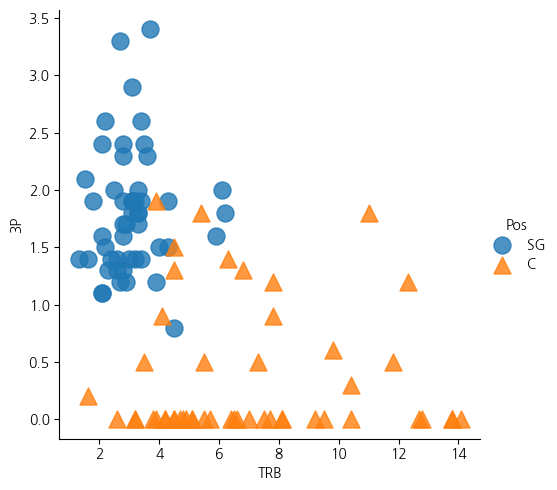

In [46]:
# 리바운드와 3점슛 시각화
sns.lmplot(x='TRB', y='3P', data=df,
           hue='Pos', scatter_kws={'s':150},
           markers=['o', '^'],
           fit_reg=False)

plt.show()

# 데이터 전처리
- 앞선 시각화를 통해 2점슛, 어시스트, 스틸의 특성은 슈팅가드와 센터를 분류하는데 큰 도움이 되지 않는다는 것을 파악했다.
- 불필요하다고 판단한 속성을 제거하고 작업을 수행한다.

In [47]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [48]:
x = df[['3P', 'BLK', 'TRB']]
y = df['Pos']
x.shape, y.shape

((100, 3), (100,))

## train / test

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [50]:
x_train.shape, y_test.shape

((80, 3), (20,))

## 최적의 k 찾기

- KNN알고리즘에서 조절가능한 변수는 오직 하나인 이웃의 개수(k)
- k의 개수에 따라 모델의 예측값도 달라진다.
- 따라서 예측값이 가장 높은 최적의 k를 찾는 것이 knn 알고리즘에서 중요한 단계이다.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score

# 교차검증을 통해 k를 찾는 작업
# k의 범위는 학습데이터의 절반을 사용
max_range = x_train.shape[0] // 2  # 정수 몫

k_list = []

for k in range(3, max_range, 2):
  k_list.append(k)

# 교차 검증값을 저장할 변수
cross_scores = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
  cross_scores.append(score.mean())

cross_scores

[0.9125,
 0.9125,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.9375,
 0.9125,
 0.925,
 0.9125,
 0.8875,
 0.9,
 0.875,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.8375]

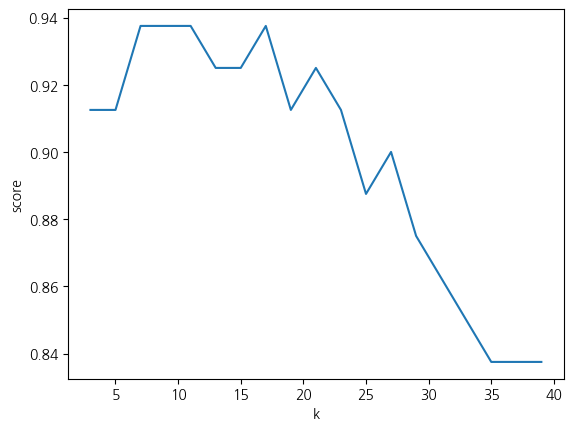

In [52]:
plt.plot(k_list, cross_scores)
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [53]:
k = k_list[cross_scores.index(max(cross_scores))]
k

7

# 데이터 모델링

In [54]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

In [56]:
son = pd.DataFrame({'y': y_test, 'predict':pred})
son

,y,predict
26,SG,SG
86,SG,SG
2,C,C
55,SG,SG
75,C,C
93,C,C
16,C,C
73,SG,SG
54,C,SG
95,C,C


In [57]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.85
